In [26]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import numpy as np
import os

In [33]:
#데이터 준비
(독립, 종속), (독립2, 종속2) = tf.keras.datasets.cifar10.load_data()
#print(독립.shape, 종속.shape)

독립r = 독립.reshape(50000, 1024, 3)
독립2r = 독립2.reshape(10000, 1024, 3)

# 종속 데이터를 1차원 배열로 변환
종속 = 종속.ravel()
종속 = pd.get_dummies(종속)
#print(종속)
# print(독립r.shape, 종속.shape)
# plt.imshow(독립2[1])

In [36]:
#모델 만들기
X = tf.keras.layers.Input(shape=[1024 * 3])
H = tf.keras.layers.Dense(84, activation='swish') (X)
Y = tf.keras.layers.Dense(10, activation='softmax') (H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
#모델 학습하기
model.fit(독립r, 종속, epochs=10)

#모델 구조 확인
#model.summary()

Epoch 1/10


ValueError: in user code:

    File "c:\Users\ddora\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ddora\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ddora\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ddora\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\ddora\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ddora\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_6" is incompatible with the layer: expected shape=(None, 3072), found shape=(None, 1024, 3)


In [ ]:

image_list = []
image_listR = []
gray_image_list = []
gray_image_listR = []
inverted_gray_image_list = []
inverted_gray_image_listR = []

def ImageSetting(file_name, number):
    image_path = os.path.join(os.getcwd(), file_name)
    image = Image.open(image_path)
    gray_image = image.convert('L')
    inverted_gray_image = ImageOps.invert(gray_image)
    image_array = np.array(image)
    gray_image_array = np.array(gray_image)
    inverted_gray_image_array = np.array(inverted_gray_image)
    image_arrayR = image_array.reshape(1, 784)
    gray_image_arrayR = image_array.reshape(1, 784)
    inverted_gray_image_arrayR = inverted_gray_image_array.reshape(1, 784)

    image_list.insert(number, image_array)
    image_listR.insert(number, image_arrayR)
    gray_image_list.insert(number, gray_image_array)
    gray_image_listR.insert(number, gray_image_arrayR)
    inverted_gray_image_list.insert(number, inverted_gray_image_array)
    inverted_gray_image_listR.insert(number, inverted_gray_image_arrayR)




In [ ]:
#모델 이용
loss, accuracy = model.evaluate(독립r, 종속)

ImageSetting('1.png', 0)
ImageSetting('2.png', 1)
pred = model.predict(image_listR[1])
print("정확도: ",accuracy) #<--- 정확도 출력 방법 찾아보기
pd.DataFrame(pred).round(2)
#plt.imshow(image_list[1])
#print("값은: ", 종속)

1/1 [==============================] - 0s 27ms/step
정확도:  0.0


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.43,0.51,0.01,0.0,0.0,0.02,0.04,0.0,0.0


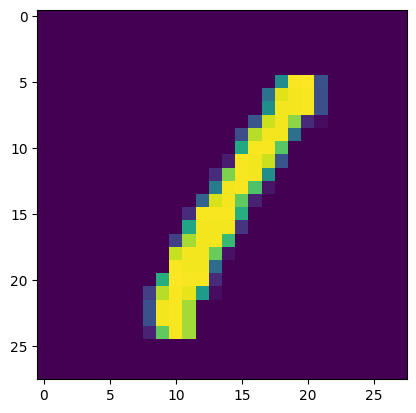

In [ ]:
#print(종속[0:100])
plt.imshow(독립[2])
#image_arrayR = image_array.reshape(3136, 784)
#print(gray_image_array)
